In [1]:
# Step 1: Install Required Libraries
!pip install tensorflow scikit-learn matplotlib joblib pandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Step 2: Import Required Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import joblib

In [3]:
# Step 3: Generate Simulated AQI Data (365 Days)
np.random.seed(42)
aqi_values = np.cumsum(np.random.randn(365) * 2 + 0.2) + 100

In [4]:
# Convert to DataFrame and Save
df = pd.DataFrame({'AQI': aqi_values})
df.to_csv("aqi_sample_data.csv", index=False)

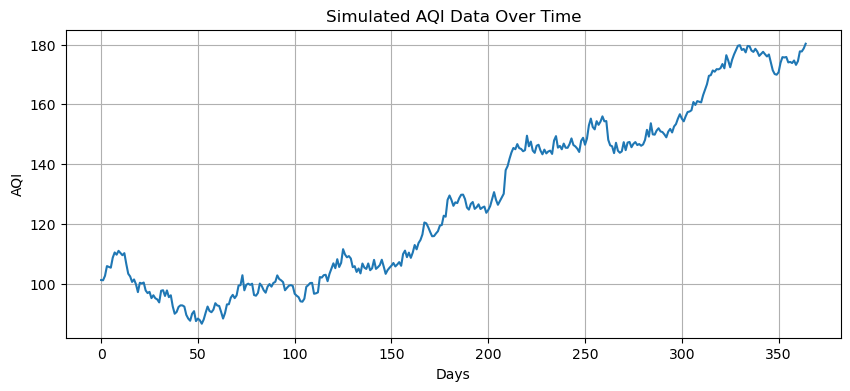

In [5]:
# Step 4: Visualize the AQI Data
plt.figure(figsize=(10, 4))
plt.plot(df['AQI'])
plt.title("Simulated AQI Data Over Time")
plt.xlabel("Days")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

In [6]:
# Step 5: Normalize Using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [7]:
# Step 6: Create Sequences for LSTM
SEQ_LENGTH = 14

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LENGTH)

In [8]:
# Step 7: Split Data into Training and Test Sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [9]:
# Step 8: Build and Train the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20)

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1656
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1185 
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0477 
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0114 
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0017
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━

In [10]:
from tensorflow import keras

model = keras.models.load_model('greenguard_lstm_model.h5', compile=False)
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
from tensorflow.keras.models import load_model
model = load_model('greenguard_lstm_model.h5', compile=False)
model.save('greenguard_lstm_model.h5')

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20)
model.save('greenguard_lstm_model.h5')

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1538
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1014 
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0368 
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0095
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0069
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0018 
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━

In [13]:
from tensorflow.keras.models import load_model
model = load_model('greenguard_lstm_model.h5', compile=False)

In [14]:
# Step 10: Predict and Plot Results
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step


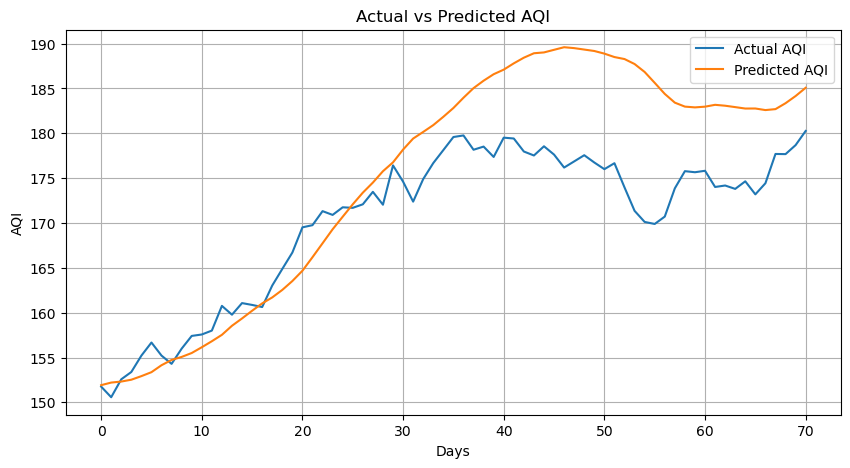

In [15]:
# Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual AQI')
plt.plot(y_pred_inv, label='Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Step 11: Forecast the Next Day AQI
last_seq = scaled_data[-SEQ_LENGTH:]
input_seq = last_seq.reshape((1, SEQ_LENGTH, 1))
forecast = model.predict(input_seq)
forecast_aqi = scaler.inverse_transform(forecast)[0][0]

print("📅 Forecasted AQI for Tomorrow:", round(forecast_aqi, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
📅 Forecasted AQI for Tomorrow: 186.09
